In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('Air Quality.csv')

In [3]:
df.head(10)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN
5,667327,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2020,01/01/2020,16.19,NaN
6,172607,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,306308,Chelsea-Village,Annual Average 2009,12/01/2008,38.16,NaN
7,172675,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,306308,Chelsea-Village,Annual Average 2011,12/01/2010,34.96,NaN
8,175345,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,206,Borough Park,Winter 2010-11,12/01/2010,30.10,NaN
9,176689,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,206,Borough Park,Annual Average 2013,12/01/2012,20.23,NaN


In [4]:
df.tail(10)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
16208,602701,375,Nitrogen dioxide (NO2),Mean,ppb,Borough,5,Staten Island,Winter 2017-18,12/01/2017,18.92,NaN
16209,221842,386,Ozone (O3),Mean,ppb,UHF34,205,Sunset Park,Summer 2014,06/01/2014,30.60,NaN
16210,171567,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,205,Sunset Park,Winter 2008-09,12/01/2008,30.17,NaN
16211,211560,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,205,Sunset Park,Winter 2013-14,12/01/2013,27.68,NaN
16212,130834,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",Borough,5,Staten Island,2005-2007,01/01/2005,55.30,NaN
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10,NaN
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30,NaN
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50,NaN
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80,NaN
16217,325247,643,Annual vehicle miles traveled,million miles,per km2,CD,107,Upper West Side (CD7),2016,01/01/2016,50.00,NaN


In [5]:
df.shape

(16218, 12)

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID         int64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object

In [8]:
df.nunique()

Unique ID         16218
Indicator ID         21
Name                 18
Measure               8
Measure Info          8
Geo Type Name         5
Geo Join ID          72
Geo Place Name      114
Time Period          50
Start_Date           40
Data Value         3649
Message               0
dtype: int64

In [9]:
print(df['Name'].unique())
print(df['Measure'].unique())
print(df['Unique ID'].unique())

['Nitrogen dioxide (NO2)' 'Fine particles (PM 2.5)' 'Ozone (O3)'
 'Asthma emergency department visits due to PM2.5'
 'Annual vehicle miles traveled' 'Asthma hospitalizations due to Ozone'
 'Respiratory hospitalizations due to PM2.5 (age 20+)'
 'Boiler Emissions- Total SO2 Emissions'
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)'
 'Boiler Emissions- Total PM2.5 Emissions'
 'Boiler Emissions- Total NOx Emissions'
 'Annual vehicle miles travelled (cars)'
 'Annual vehicle miles travelled (trucks)'
 'Cardiac and respiratory deaths due to Ozone'
 'Asthma emergency departments visits due to Ozone'
 'Outdoor Air Toxics - Formaldehyde' 'Outdoor Air Toxics - Benzene'
 'Deaths due to PM2.5']
['Mean' 'Estimated annual rate (under age 18)' 'million miles'
 'Estimated annual rate (age 18+)' 'Estimated annual rate'
 'Number per km2' 'Annual average concentration'
 'Estimated annual rate (age 30+)']
[172653 172585 336637 ... 131020 131026 325247]


In [10]:
df.isnull().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16218
dtype: int64

In [11]:
df['Message'].fillna(0, inplace=True)

In [12]:
df.isnull().sum()

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Time Period       0
Start_Date        0
Data Value        0
Message           0
dtype: int64

In [13]:
df.columns

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

In [14]:
df[['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period', 'Start_Date', 'Data Value', 'Message']]

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,0.0
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,0.0
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,0.0
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,0.0
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,UHF42,211,Williamsburg - Bushwick,2005,01/01/2005,3.10,0.0
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,µg/m3,Borough,5,Staten Island,2005,01/01/2005,2.30,0.0
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",UHF42,504,South Beach - Tottenville,2005-2007,01/01/2005,7.50,0.0
16216,131026,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,"per 100,000",Borough,5,Staten Island,2005-2007,01/01/2005,7.80,0.0


In [15]:
for col in df.columns:
  print(f"Unique values in {col} are: {df[col].unique()}")

Unique values in Unique ID are: [172653 172585 336637 ... 131020 131026 325247]
Unique values in Indicator ID are: [375 365 386 648 643 657 661 650 640 651 641 642 644 645 652 659 655 653
 647 646 639]
Unique values in Name are: ['Nitrogen dioxide (NO2)' 'Fine particles (PM 2.5)' 'Ozone (O3)'
 'Asthma emergency department visits due to PM2.5'
 'Annual vehicle miles traveled' 'Asthma hospitalizations due to Ozone'
 'Respiratory hospitalizations due to PM2.5 (age 20+)'
 'Boiler Emissions- Total SO2 Emissions'
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)'
 'Boiler Emissions- Total PM2.5 Emissions'
 'Boiler Emissions- Total NOx Emissions'
 'Annual vehicle miles travelled (cars)'
 'Annual vehicle miles travelled (trucks)'
 'Cardiac and respiratory deaths due to Ozone'
 'Asthma emergency departments visits due to Ozone'
 'Outdoor Air Toxics - Formaldehyde' 'Outdoor Air Toxics - Benzene'
 'Deaths due to PM2.5']
Unique values in Measure are: ['Mean' 'Estimated annual rate (under ag

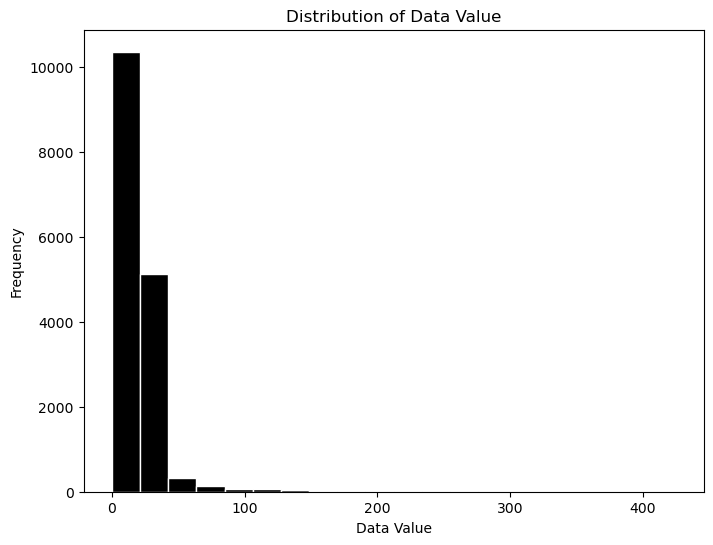

In [16]:
# Histogram of 'Data Value'
plt.figure(figsize=(8, 6))
plt.hist(df['Data Value'], bins=20, color='black', edgecolor='white')
plt.title('Distribution of Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()

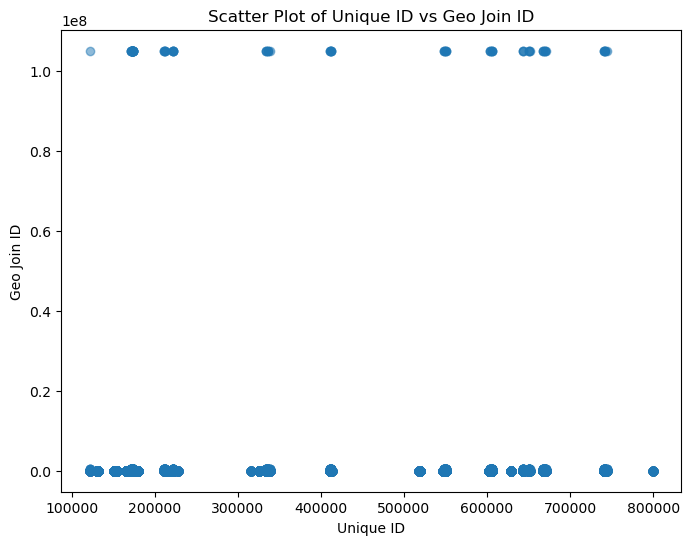

In [17]:
# Scatter plot of 'Unique ID' against 'Geo Join ID'
plt.figure(figsize=(8, 6))
plt.scatter(df['Unique ID'], df['Geo Join ID'], alpha=0.5)
plt.title('Scatter Plot of Unique ID vs Geo Join ID')
plt.xlabel('Unique ID')
plt.ylabel('Geo Join ID')
plt.show()

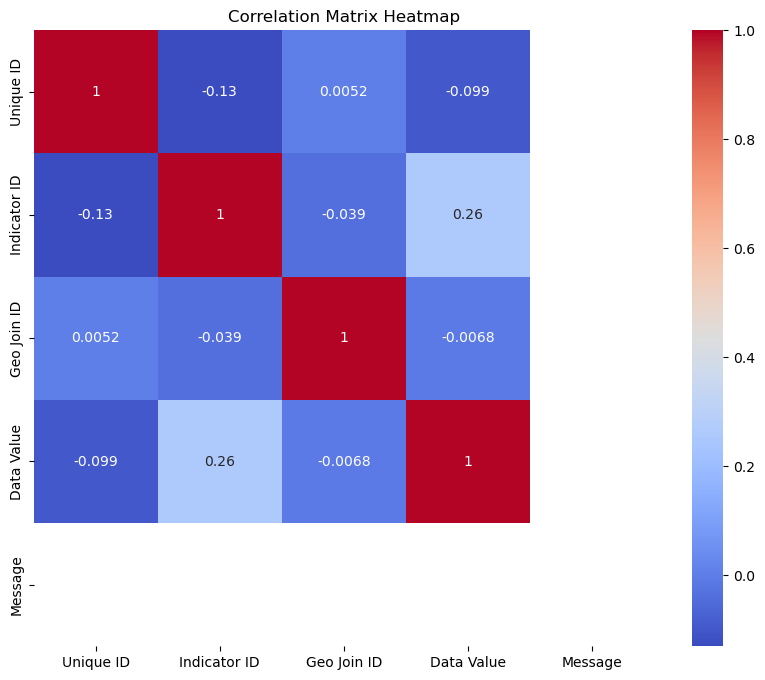

In [18]:
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
corr_matrix = numeric_columns.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\m.sudarshan goud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\m.sudarshan goud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\m.sudarshan goud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\m.sudarshan goud\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

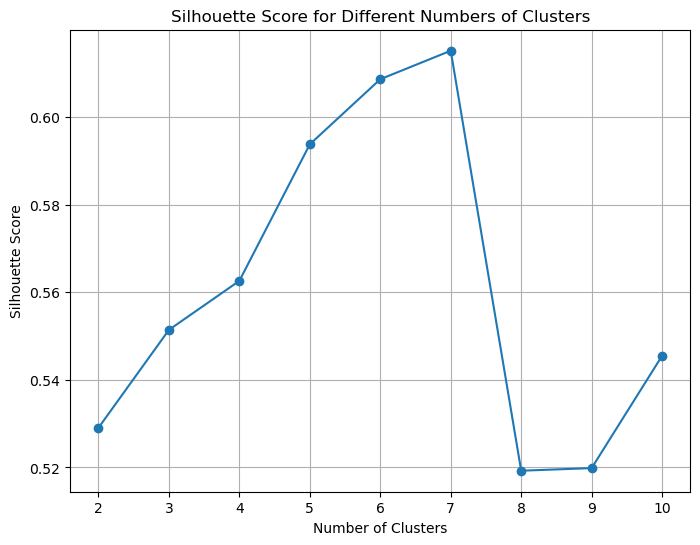

In [19]:
# Select only numerical columns for clustering
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(numeric_df)

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Calculate silhouette score for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

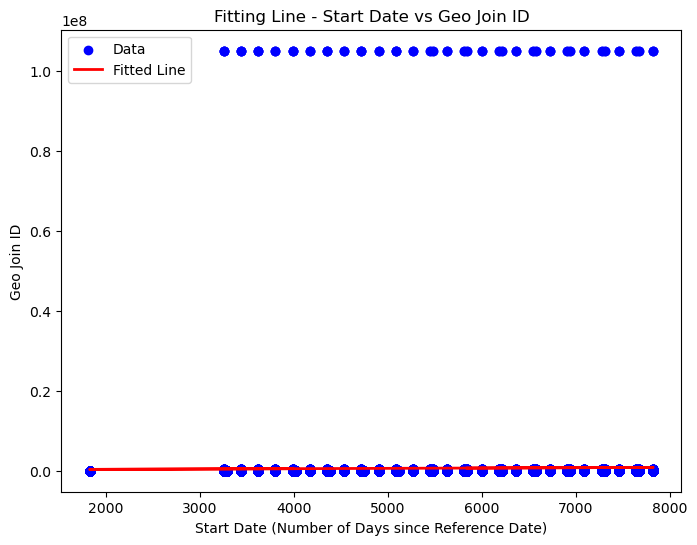

In [20]:
# Convert 'Start_Date' to datetime format
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

# Convert 'Start_Date' to the number of days since a reference date
ref_date = pd.to_datetime('2000-01-01')  # Choose a reference date
df['Start_Date_Num_Days'] = (df['Start_Date'] - ref_date).dt.days

# Extract features and target variable for linear regression
X = df['Start_Date_Num_Days'].values.reshape(-1, 1)  # Features
y = df['Geo Join ID'].values  # Target variable

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot the data and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(df['Start_Date_Num_Days'], df['Geo Join ID'], color='blue', label='Data')
plt.plot(df['Start_Date_Num_Days'], y_pred, color='red', linewidth=2, label='Fitted Line')
plt.title('Fitting Line - Start Date vs Geo Join ID')
plt.xlabel('Start Date (Number of Days since Reference Date)')
plt.ylabel('Geo Join ID')
plt.legend()
plt.show()
